<a href="https://colab.research.google.com/github/aneeshmurali-n/ANN-Diabetes-Prediction/blob/main/DL_ANN_Diabetes_Progression_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Modules

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.callbacks import EarlyStopping

##Import Diabetes Dataset from Sklearn

In [2]:
from sklearn.datasets import load_diabetes

#1.Loading and Preprocessing

### Load dataset

In [3]:
# load_diabetes() function returns a Bunch object of diabetes dataset
diabetes = load_diabetes(scaled=False)  # loading un-scaled data to show how to scale to be done

# Make DataFrame of the diabetes dataset
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [4]:
# Add target feature into the df
df['Diabetes Progression'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Diabetes Progression
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [5]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Diabetes Progression
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


### Handle any missing values if present.

In [6]:
# Check missing values
print(df.isnull().sum())

age                     0
sex                     0
bmi                     0
bp                      0
s1                      0
s2                      0
s3                      0
s4                      0
s5                      0
s6                      0
Diabetes Progression    0
dtype: int64


No missing values present.

#### Outliers Check

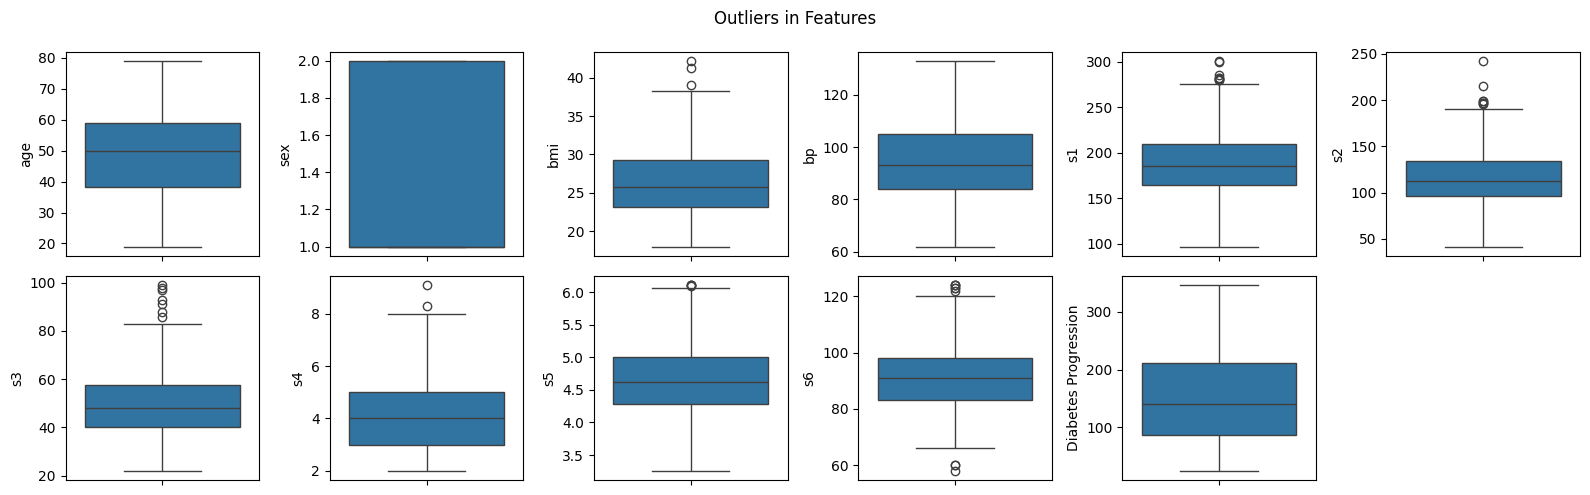

In [7]:
plt.figure(figsize=(16,5))
plt_index = 0
for col in ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6','Diabetes Progression']:
  plt_index +=1
  plt.subplot(2,6,plt_index)
  sns.boxplot(data=df[col])
plt.suptitle('Outliers in Features')
plt.tight_layout()
plt.show()

#### Handle outliers

In [8]:
for col in ['bmi','s1','s2','s3','s4','s5','s6']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col]<lower_bound, lower_bound, np.where(df[col]>upper_bound, upper_bound, df[col]))


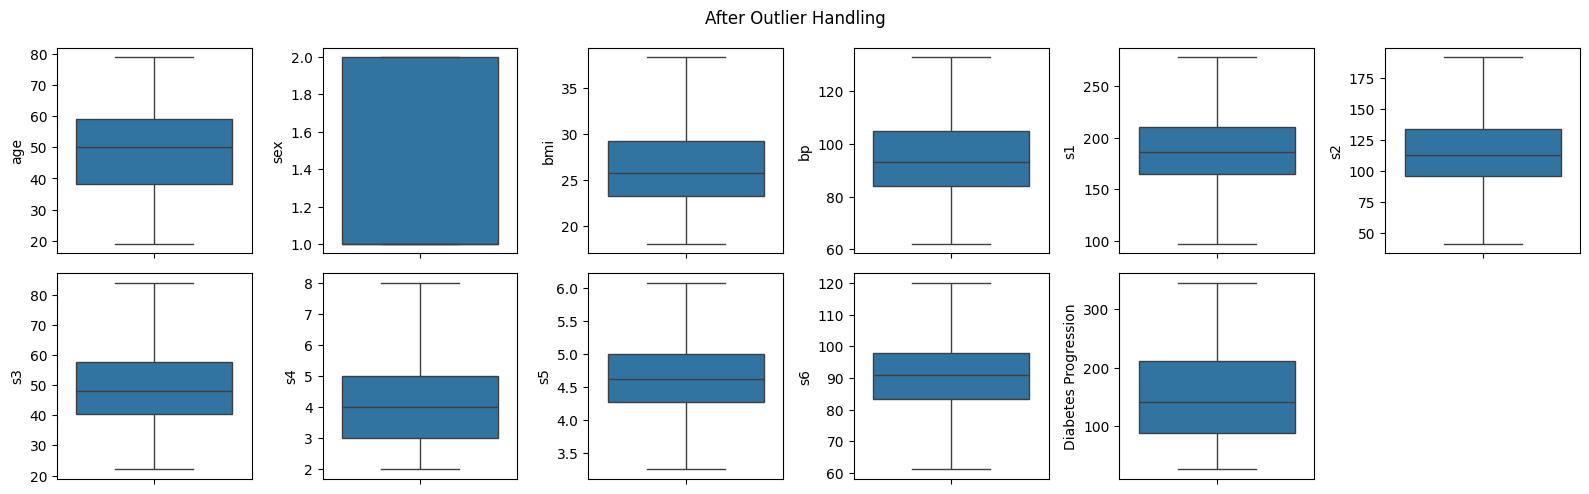

In [9]:
plt.figure(figsize=(16,5))
plt_index = 0
for col in ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6','Diabetes Progression']:
  plt_index +=1
  plt.subplot(2,6,plt_index)
  sns.boxplot(data=df[col])
plt.suptitle('After Outlier Handling')
plt.tight_layout()
plt.show()

In [10]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Diabetes Progression
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.358965,94.647014,188.986425,115.213857,49.643665,4.067149,4.641183,91.228790,152.133484
std,13.109028,0.499561,4.365892,13.831283,34.172164,29.715466,12.476566,1.279829,0.521757,11.346132,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,61.125000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,38.387500,133.000000,278.000000,192.175000,84.000000,8.000000,6.077950,120.125000,346.000000


### Normalize the features to ensure better performance of the ANN model.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   442 non-null    float64
 1   sex                   442 non-null    float64
 2   bmi                   442 non-null    float64
 3   bp                    442 non-null    float64
 4   s1                    442 non-null    float64
 5   s2                    442 non-null    float64
 6   s3                    442 non-null    float64
 7   s4                    442 non-null    float64
 8   s5                    442 non-null    float64
 9   s6                    442 non-null    float64
 10  Diabetes Progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [12]:
# Split x and y
x = df.drop('Diabetes Progression', axis=1)
y = df['Diabetes Progression']

In [13]:
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [14]:
y.head()

,Diabetes Progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


#### Peform StandardScaler on x features



In [15]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled, columns = x.columns, index = x.index)
x_scaled_df.head()  # scaled x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.316464,0.459841,-0.937098,-0.741661,-0.934300,-0.052527,0.419476,-0.373130
1,-0.039567,-0.938537,-1.091268,-0.553505,-0.175383,-0.404755,1.633414,-0.834766,-1.437896,-1.961371
2,1.793307,1.065488,0.949572,-0.119214,-0.966395,-0.728185,-0.693577,-0.052527,0.060665,-0.549601
3,-1.872441,-0.938537,-0.242829,-0.770650,0.264068,0.545322,-0.773818,0.729713,0.477998,-0.196659
4,0.113172,-0.938537,-0.770237,0.459841,0.088288,0.343178,0.189075,-0.052527,-0.672881,-0.990779


In [16]:
# Join x_scaled_df and y
scaled_df = pd.concat([x_scaled_df, y], axis=1)
scaled_df.head() # scaled df with un_scaled y

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Diabetes Progression
0,0.800500,1.065488,1.316464,0.459841,-0.937098,-0.741661,-0.934300,-0.052527,0.419476,-0.373130,151.0
1,-0.039567,-0.938537,-1.091268,-0.553505,-0.175383,-0.404755,1.633414,-0.834766,-1.437896,-1.961371,75.0
2,1.793307,1.065488,0.949572,-0.119214,-0.966395,-0.728185,-0.693577,-0.052527,0.060665,-0.549601,141.0
3,-1.872441,-0.938537,-0.242829,-0.770650,0.264068,0.545322,-0.773818,0.729713,0.477998,-0.196659,206.0
4,0.113172,-0.938537,-0.770237,0.459841,0.088288,0.343178,0.189075,-0.052527,-0.672881,-0.990779,135.0


#2.Exploratory Data Analysis (EDA)

###Perform EDA to understand the distribution of features and the target variable.

In [17]:
scaled_df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'Diabetes Progression'],
      dtype='object')

In [18]:
len(scaled_df.columns   )

11

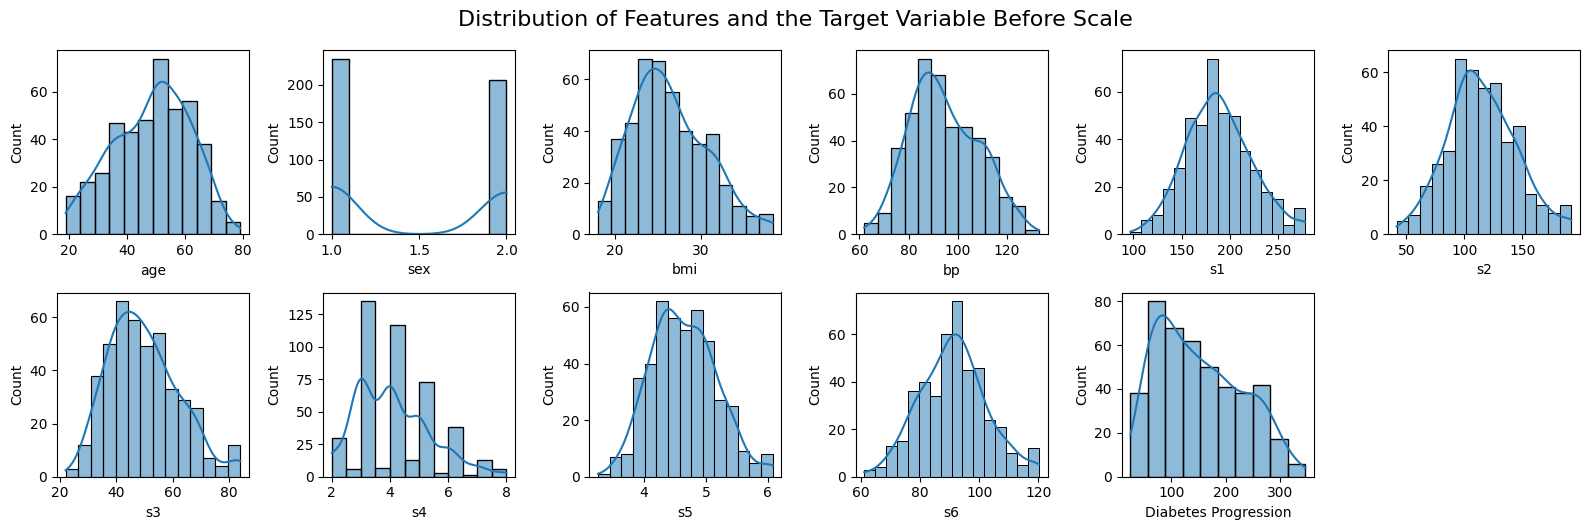

In [19]:
plt.figure(figsize=(16,5))
index = 0
for col in df.columns:
    index += 1
    plt.subplot(2, 6, index)
    sns.histplot(df[col], kde=True)
plt.tight_layout()
plt.suptitle('Distribution of Features and the Target Variable Before Scale', y=1.05, fontsize = 16)
plt.show()

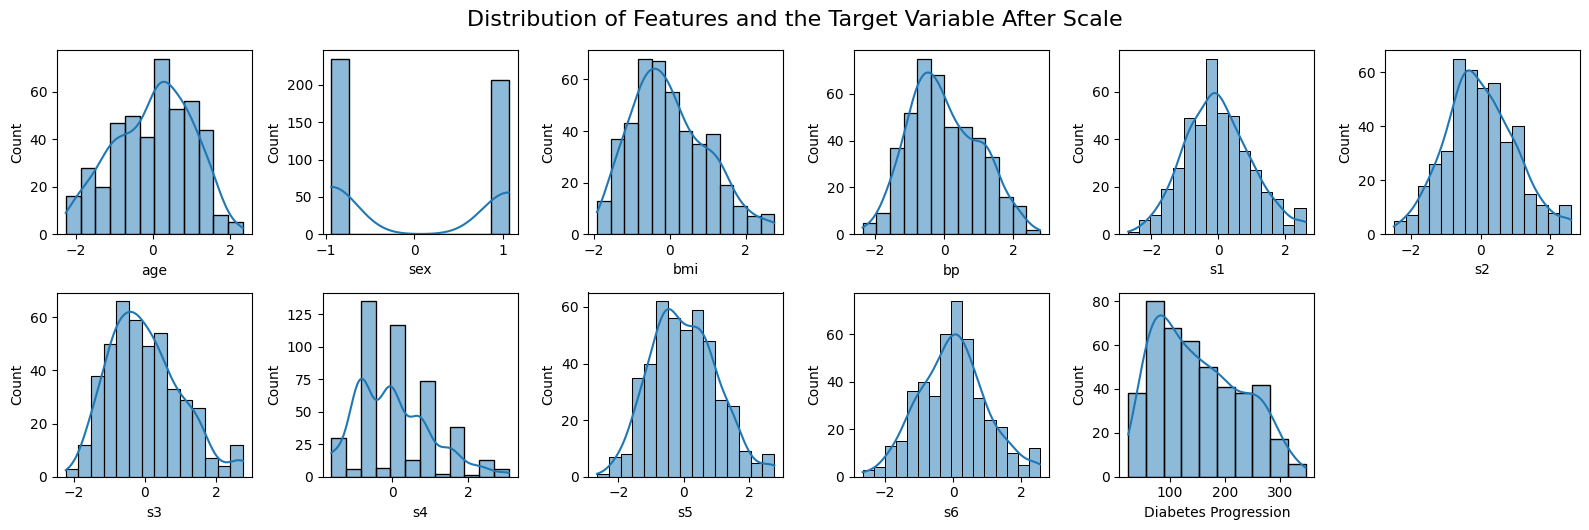

In [20]:
plt.figure(figsize=(16,5))
index = 0
for col in scaled_df.columns:
    index += 1
    plt.subplot(2, 6, index)
    sns.histplot(scaled_df[col], kde=True)
plt.tight_layout()
plt.suptitle('Distribution of Features and the Target Variable After Scale', y=1.05, fontsize = 16)
plt.show()

**NOTE:** Scaling wasn't performed on the target variable.

In [21]:
scaled_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Diabetes Progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,8.037814e-18,1.607563e-16,9.906605e-16,1.060991e-15,-1.044916e-16,1.004727e-16,-1.848697e-16,1.607563e-17,-1.880848e-15,1.245861e-16,152.133484
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,77.093005
min,-2.254290e+00,-9.385367e-01,-1.916776e+00,-2.363050e+00,-2.694903e+00,-2.480098e+00,-2.218158e+00,-1.617006e+00,-2.653822e+00,-2.656227e+00,25.000000
25%,-7.841722e-01,-9.385367e-01,-7.243754e-01,-7.706500e-01,-7.246967e-01,-6.456427e-01,-7.537579e-01,-8.347664e-01,-6.993605e-01,-7.040136e-01,87.000000
50%,1.131724e-01,-9.385367e-01,-1.511058e-01,-1.192138e-01,-8.749254e-02,-7.458628e-02,-1.318895e-01,-5.252685e-02,-4.054992e-02,-2.018740e-02,140.500000
75%,8.005001e-01,1.065488e+00,6.686696e-01,7.493678e-01,6.083051e-01,6.497625e-01,6.504611e-01,7.297127e-01,6.831152e-01,5.974621e-01,211.500000
max,2.327895e+00,1.065488e+00,2.758237e+00,2.776058e+00,2.607808e+00,2.592870e+00,2.756790e+00,3.076431e+00,2.756829e+00,2.549676e+00,346.000000


###Visualize the relationships between features and the target variable.

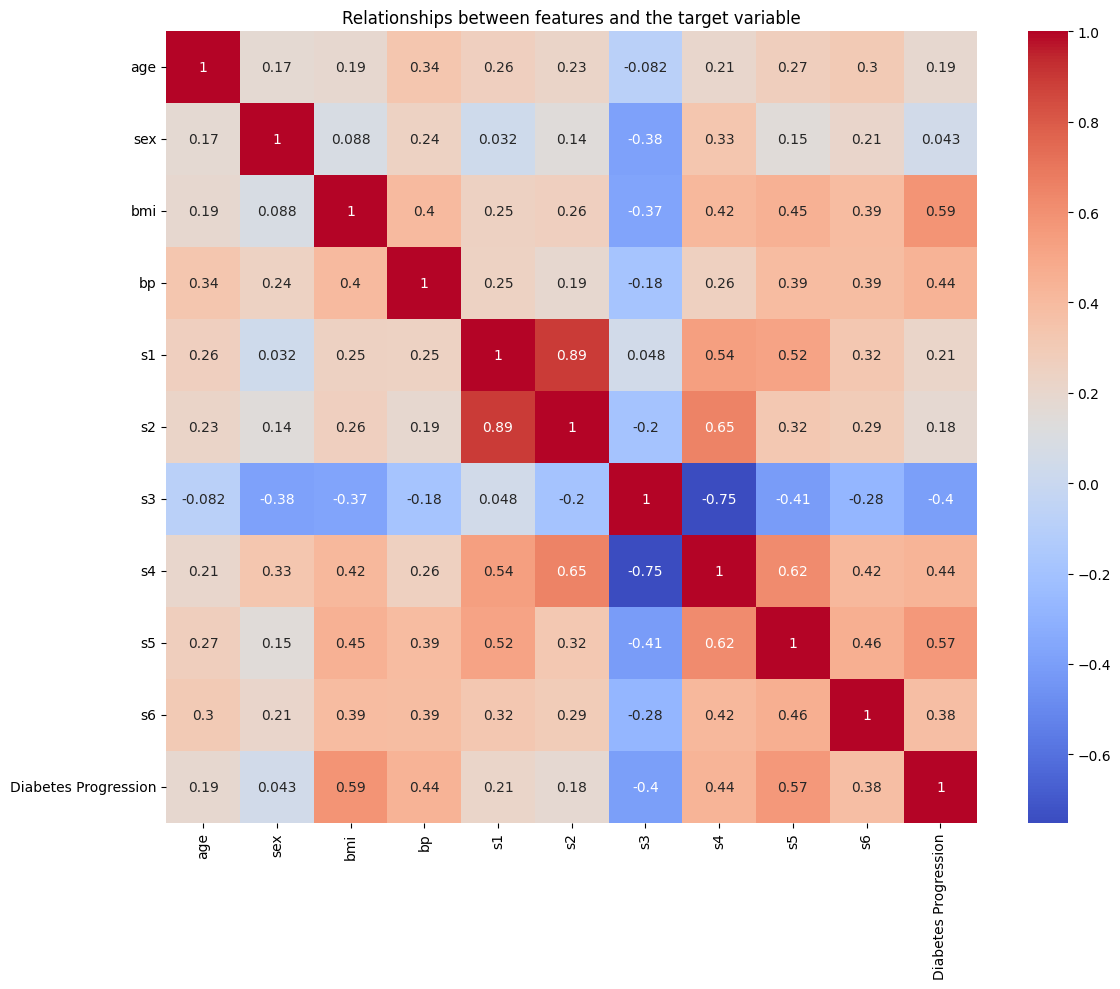

In [22]:
corr_matrix = scaled_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=corr_matrix,annot=True,cmap='coolwarm')
plt.title('Relationships between features and the target variable')
plt.tight_layout()
plt.show()

####**INSIGHTS:**

**Features with Strong Correlation to Diabetes Progression:**
* BMI: 0.59 (strong positive correlation)
* S5: 0.57 (strong positive correlation)
* BP: 0.44 (moderate positive correlation)
* S4: 0.44 (moderate positive correlation)
* S3: -0.40(moderate negative correlation)
* S6: 0.38 (moderate positive correlation)

**Multicollinearity:**

* S1 and S2: Correlation = 0.89 (very high)
* S4 and S2: Correlation = 0.65 (high)
* S4 and S5: Correlation = 0.62 (moderate)
* S3 and S4: Correlation = -0.75 (high negative)

**Best Features:**
* BMI (0.59 correlation with target)
* S5 (0.57 correlation with target)
* BP (0.44 correlation with target)
* S6 (0.38 correlation with target)
* S3 (-0.40 correlation with target)


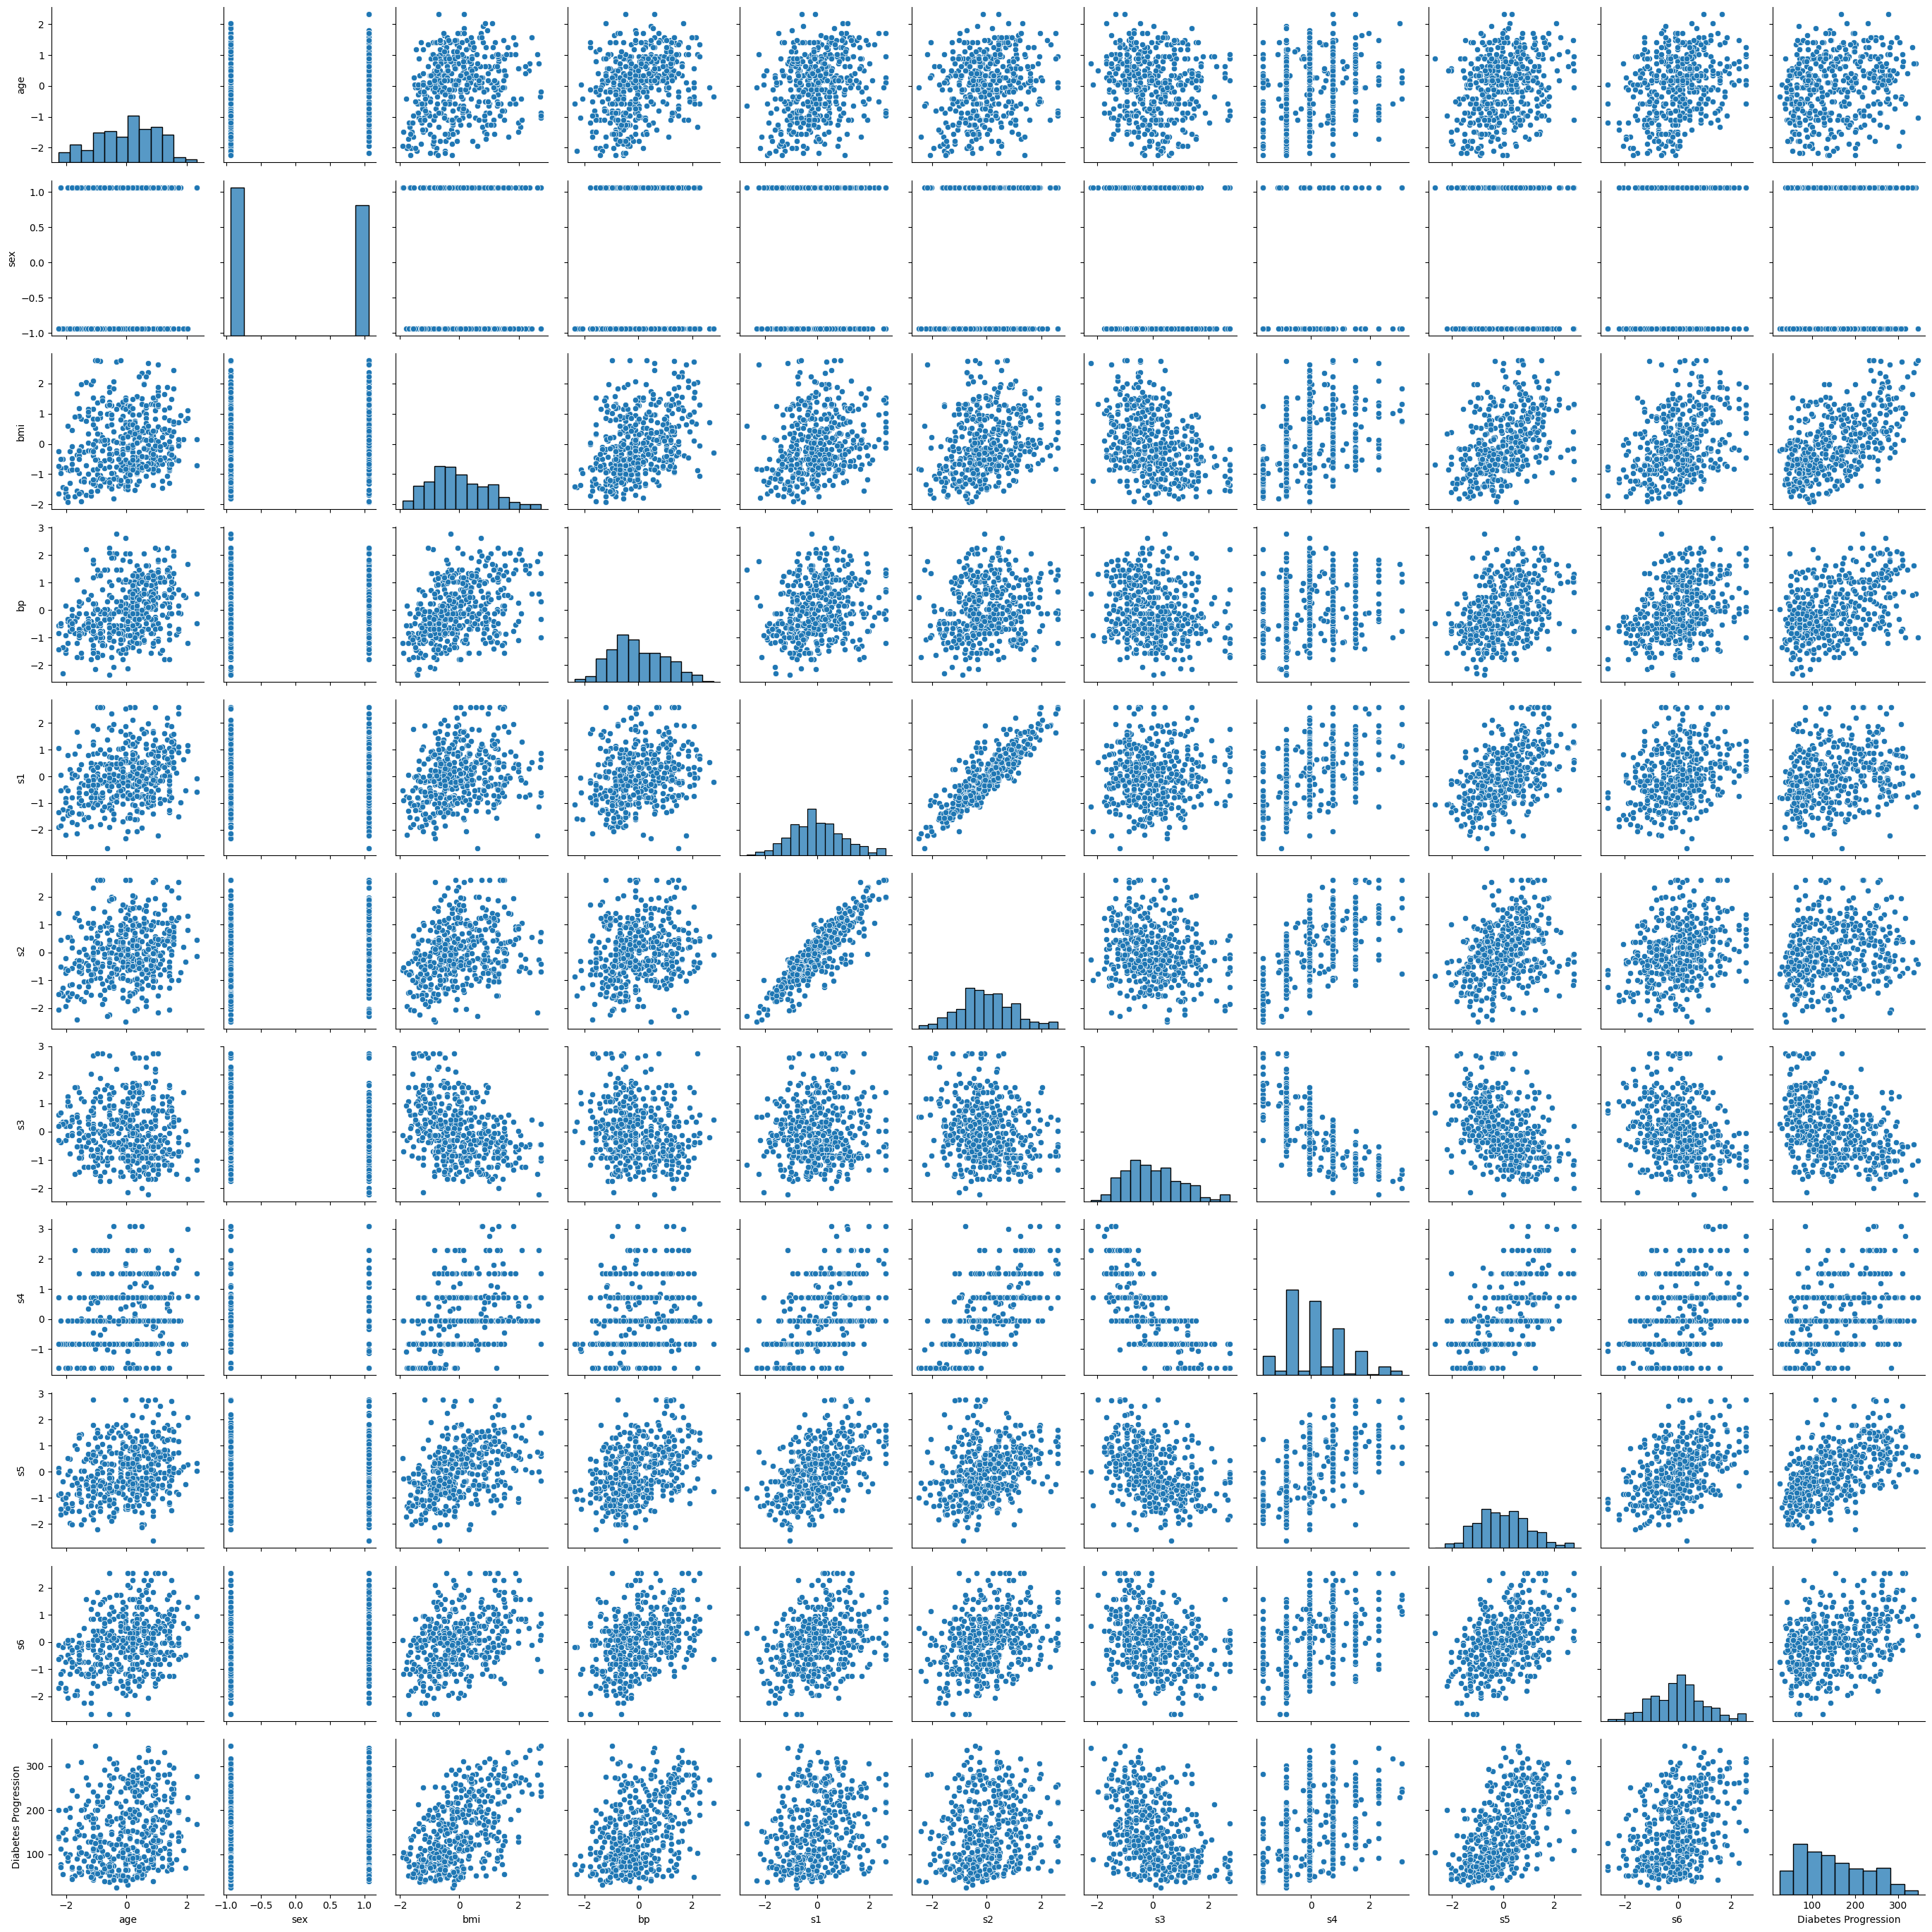

In [23]:
sns.pairplot(scaled_df)
plt.tight_layout()
plt.show()

**Remark:**
* BMI and S5 shows a strong linear relation with the diabetes progression
* S3 shows negative linear relation with the diabetes progression

#3.Building the ANN Model

* Design a simple ANN architecture.

In [24]:
# Create ANN Basic Neural Network With 1 Hidden Layer
model = Sequential()
model.add(Dense(10))                                          # Input layer
model.add(Dense(10, activation='relu'))                       # Hidden layer 1 with relu activation function
model.add(Dense(1))                                           # Output Layer
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

#4.Training the ANN Model

In [25]:
x_scaled_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.316464,0.459841,-0.937098,-0.741661,-0.934300,-0.052527,0.419476,-0.373130
1,-0.039567,-0.938537,-1.091268,-0.553505,-0.175383,-0.404755,1.633414,-0.834766,-1.437896,-1.961371
2,1.793307,1.065488,0.949572,-0.119214,-0.966395,-0.728185,-0.693577,-0.052527,0.060665,-0.549601
3,-1.872441,-0.938537,-0.242829,-0.770650,0.264068,0.545322,-0.773818,0.729713,0.477998,-0.196659
4,0.113172,-0.938537,-0.770237,0.459841,0.088288,0.343178,0.189075,-0.052527,-0.672881,-0.990779


In [26]:
# BMI: 0.59 (strong positive correlation)
# S5: 0.57 (strong positive correlation)
# BP: 0.44 (moderate positive correlation)
# S4: 0.44 (moderate positive correlation)
# S3: -0.40(moderate negative correlation)
# S6: 0.38 (moderate positive correlation)
# bmi and S5 shows a strong linear relation with the diabetes progression
# s3 shows negative linear relation with the diabetes progression

#x_final = x_scaled_df[['bmi','s5','bp','s6','s3']] # best 5 feature  need to update model input layer
x_final = x_scaled_df                             # whole 'x' features  need to update model input layer
x_final.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.316464,0.459841,-0.937098,-0.741661,-0.934300,-0.052527,0.419476,-0.373130
1,-0.039567,-0.938537,-1.091268,-0.553505,-0.175383,-0.404755,1.633414,-0.834766,-1.437896,-1.961371
2,1.793307,1.065488,0.949572,-0.119214,-0.966395,-0.728185,-0.693577,-0.052527,0.060665,-0.549601
3,-1.872441,-0.938537,-0.242829,-0.770650,0.264068,0.545322,-0.773818,0.729713,0.477998,-0.196659
4,0.113172,-0.938537,-0.770237,0.459841,0.088288,0.343178,0.189075,-0.052527,-0.672881,-0.990779


In [27]:
y.head()

,Diabetes Progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


####Split the dataset into training and testing sets.

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_final, y, test_size=0.2, random_state=42)

####Train the model on the training data.

In [29]:
history = model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 31325.5020 - mae: 156.2573 - val_loss: 22483.2383 - val_mae: 134.1295
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33300.2852 - mae: 163.4388 - val_loss: 22387.3730 - val_mae: 133.7646
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32370.8340 - mae: 161.0765 - val_loss: 22290.3633 - val_mae: 133.3928
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33686.6875 - mae: 164.8979 - val_loss: 22184.4590 - val_mae: 133.0033
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30568.3535 - mae: 156.0658 - val_loss: 22056.9023 - val_mae: 132.5410
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28127.7109 - mae: 149.6404 - val_loss: 21898.8223 - val_mae: 131.9926
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28726.4883 - mae: 150.8052 - val_loss: 21694.4375 - val_mae: 131.3168
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31731.3086 - mae: 156.8981 - val_loss

#5.Evaluating the Model

####Evaluate the model on the testing data.

In [30]:
# Evaluate the model on the testing data.
y_pred = model.predict(x_test)
y_pred = y_pred.flatten()
loss_mae = model.evaluate(x_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE : {mae}')
print(f'MSE : {mse}')
print(f'R2  : {r2}')
print(f'loss: {loss_mae[0]}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3428.4688 - mae: 47.4445 
MAE : 45.671211456984615
MSE : 3247.5463757579832
R2  : 0.38704164585938017
loss: 3247.54638671875


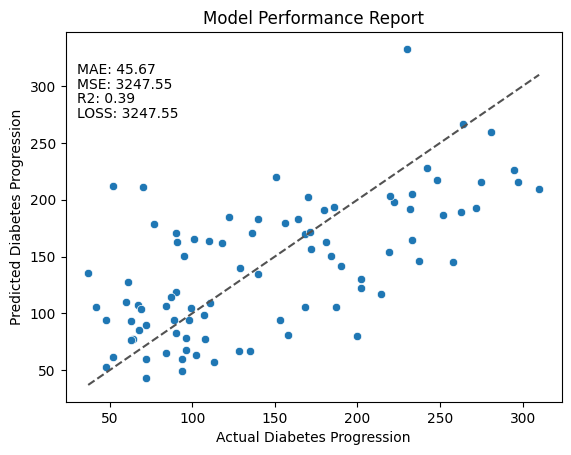

In [31]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Diabetes Progression')
plt.ylabel('Predicted Diabetes Progression')
plt.title('Model Performance Report')
plt.text(30,311,f'MAE: {mae:.2f}')
plt.text(30,298,f'MSE: {mse:.2f}')
plt.text(30,285,f'R2: {r2:.2f}')
plt.text(30,272,f'LOSS: {loss_mae[0]:.2f}')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='#525252')
plt.show()

In [32]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

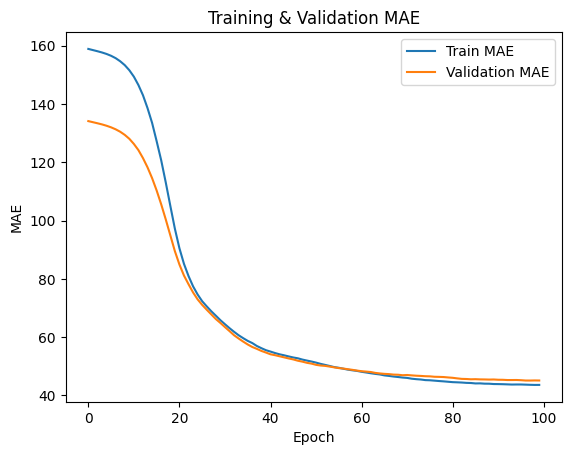

In [33]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training & Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

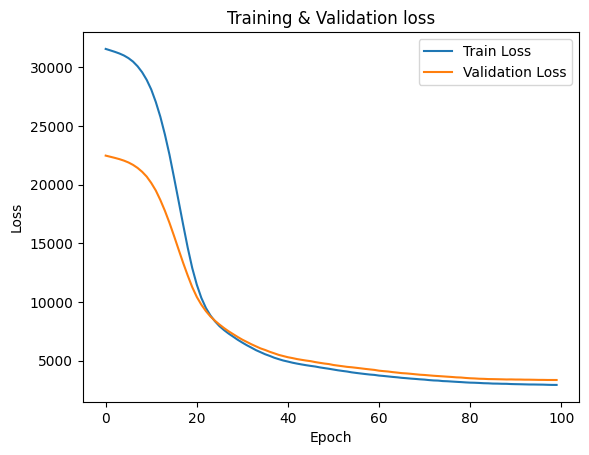

In [34]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 695 (2.72 KB)

 Trainable params: 231 (924.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 464 (1.82 KB)

#6.Improving the Model

In [60]:
# Create ANN Neural Network model with 2 hidden layers
model1 = Sequential()
model1.add(Dense(10))                       # Input layer
model1.add(Dense(20, activation='relu'))    # Hidden layer 1 with relu activation function
model1.add(Dense(10, activation='relu'))    # Hidden layer 2 with relu activation function
model1.add(Dense(1, activation='linear'))   # Output layer

model1.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [61]:
# train model1
early_stopping = EarlyStopping( monitor='val_loss', patience=10, restore_best_weights=True)
model1_history = model1.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 32966.2305 - mae: 162.2577 - val_loss: 22317.3184 - val_mae: 133.5354
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31762.3711 - mae: 158.6814 - val_loss: 22150.5254 - val_mae: 132.9903
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29780.4277 - mae: 154.5414 - val_loss: 21911.4238 - val_mae: 132.2350
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31705.4980 - mae: 159.1237 - val_loss: 21586.4238 - val_mae: 131.2102
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32662.6719 - mae: 162.5999 - val_loss: 21147.4082 - val_mae: 129.8214
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30585.5176 - mae: 157.5430 - val_loss: 20541.9824 - val_mae: 127.8754
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29968.0566 - mae: 154.8129 - val_loss: 19697.5156 - val_mae: 125.1059
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26580.9961 - mae: 145.0542 - val_loss

In [63]:
# Evaluate the model on the testing data.
m1_y_pred = model1.predict(x_test)
m1_y_pred = m1_y_pred.flatten()
m1_loss_mae = model1.evaluate(x_test, y_test)
m1_mse = mean_squared_error(y_test, m1_y_pred)
m1_mae = mean_absolute_error(y_test, m1_y_pred)
m1_r2 = r2_score(y_test, m1_y_pred)
print(f'MAE : {m1_mae}')
print(f'MSE : {m1_mse}')
print(f'R2  : {m1_r2}')
print(f'loss: {m1_loss_mae[0]}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2827.8633 - mae: 41.9828 
MAE : 40.81193058142501
MSE : 2674.3506338215543
R2  : 0.49522951384502534
loss: 2674.350341796875


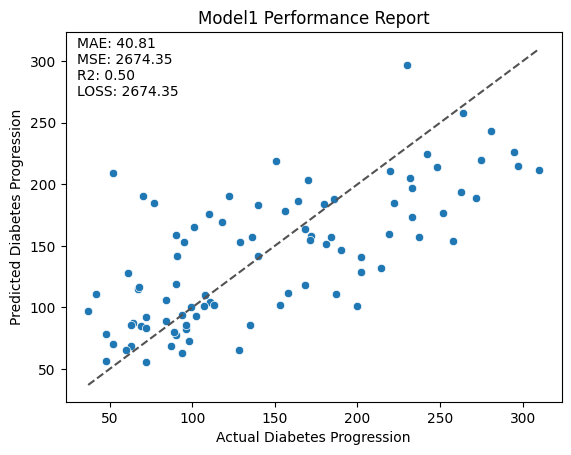

In [64]:
# plot performance
sns.scatterplot(x = y_test, y = m1_y_pred)
plt.xlabel('Actual Diabetes Progression')
plt.ylabel('Predicted Diabetes Progression')
plt.title('Model1 Performance Report')
plt.text(30,311,f'MAE: {m1_mae:.2f}')
plt.text(30,298,f'MSE: {m1_mse:.2f}')
plt.text(30,285,f'R2: {m1_r2:.2f}')
plt.text(30,272,f'LOSS: {m1_loss_mae[0]:.2f}')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='#525252')
plt.show()

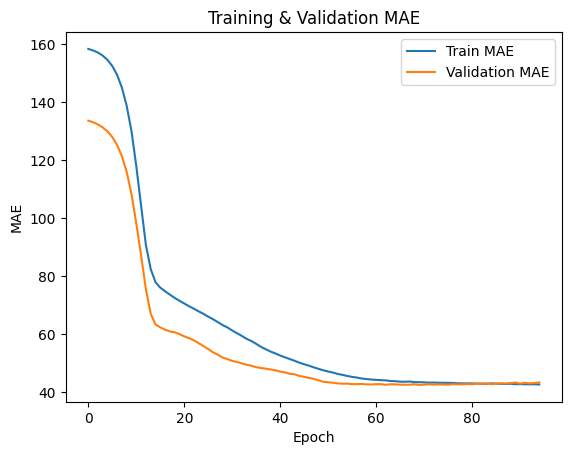

In [65]:
# plot train vs validation MAE
plt.plot(model1_history.history['mae'], label='Train MAE')
plt.plot(model1_history.history['val_mae'], label='Validation MAE')
plt.title('Training & Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

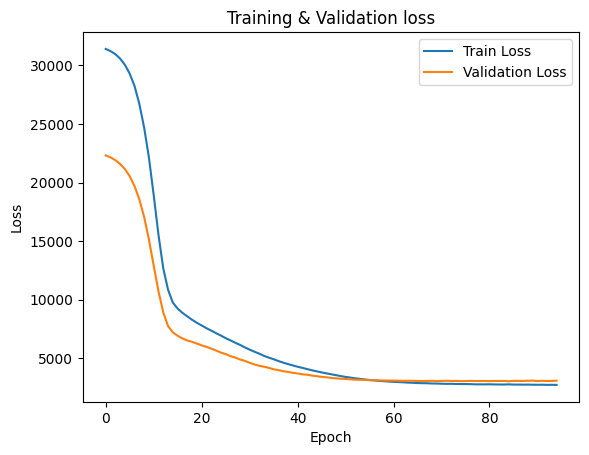

In [66]:
# plot train loss vs validation loss
plt.plot(model1_history.history['loss'], label='Train Loss')
plt.plot(model1_history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [67]:
model1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,655 (6.47 KB)

 Trainable params: 551 (2.15 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,104 (4.32 KB)

**Changes Made and Experimented:**
* Added a hidden layer (increased model complexity).
* Used early stopping to prevent overfitting.
* Adjusted and experimented with different batch sizes and epochs.
* Tuned and experimented other model parameters for instance learning rate, optimizer settings etc.

**Improvements:**
* Lower MAE and MSE.
* Higher R2 score.

